<a href="https://colab.research.google.com/github/grandfatherr/Autolib-data-for-hypothesis-testing/blob/main/Edwin_Mutuma_wk_4_IP_Moringa__School.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib data

##1.0 Defining the question

###a) Specifying the question

Check the claim that the average number of blue cars taken is different from that of the blue cars returned

###b) Defining the metrics for success

Find out if there is enough evidence to reject our null hypothesis or if we'll fail to reject the null hypothesis

###c) Understanding the context

Working as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. Autolib' was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It was operated by the Bolloré industrial group

###d) Data Relevance

Postal code - postal code of the area (in Paris)

Date - date of the row aggregation

n_daily_data_points - number of daily data poinst that were available for aggregation, that day

dayOfWeek - identifier of weekday (0: Monday -> 6: Sunday)

day_type - weekday or weekend

BlueCars_taken_sum - Number of bluecars taken that date in that area

BlueCars_returned_sum - Number of bluecars returned that date in that area

Utilib_taken_sum - Number of Utilib taken that date in that area

Utilib_returned_sum - Number of Utilib returned that date in that area

Utilib_14_taken_sum - Number of Utilib 1.4 taken that date in that area

Utilib_14_returned_sum - Number of Utilib 1.4 returned that date in that area

Slots_freed_sum - Number of recharging slots released that date in that area

Slots_taken_sum -Number of recharging slots taken that date in that area

##2.0 Importing the necessary libraries

In [1]:
# Importing the required python libraries to be used in our analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##3.0 Reading the dataset and glossary

In [2]:
# Importing the csv file for data cleaning and analysis

df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

In [3]:
# Importing the glossary file for data cleaning and analysis

df_g = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')

##4.0 Preview our dataset and glossary

In [4]:
# Previewing the top dataset

df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [5]:
# Pre-viewing the last dataset

df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [6]:
# Lets check a sample of the data

df.sample(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
7328,92290,6/19/2018,1370,1,weekday,0,2,0,0,1,0,0,0
12108,93400,3/17/2018,1440,5,weekend,142,137,3,2,11,11,0,0
1973,75013,4/15/2018,1439,6,weekend,603,648,15,17,44,45,195,200
14669,94300,6/7/2018,1439,3,weekday,80,71,2,4,4,3,0,0
6991,92260,5/25/2018,1440,4,weekday,33,22,0,1,2,4,0,0
14651,94300,5/20/2018,1440,6,weekend,84,79,3,3,3,3,0,0
10729,93170,6/7/2018,1439,3,weekday,37,32,0,0,6,7,0,0
9915,92800,4/18/2018,1377,2,weekday,98,94,4,3,2,1,15,16
5143,92130,6/18/2018,1440,0,weekday,242,249,8,7,19,18,4,3
5379,92150,3/23/2018,1440,4,weekday,202,183,7,8,10,12,5,6


In [7]:
# Previewing the glossary

df_g

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [8]:
# Checking the number of columns and rows in the dataset

print('We have '+ str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns in our dataset')

We have 16085 rows, and 13 columns in our dataset


In [9]:
# Finding the data types of the variables

df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [10]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

##5.0 Cleaning our data

As we work as data scientists, we will encounter a lot of data that is untidy. This will call for us to clean our data so as to be able to manipulate and work with our data. Data cleansing is the process in which we go through all of the data we intend to work with and either remove or update information that is incomplete, incorrect, improperly formatted, duplicated, or irrelevant

###5.1 Completeness

In [11]:
# finding the missing data in the dataset

df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

###5.2 Consistency

In [12]:
# finding the duplicates in the dataset

df.duplicated().sum()

0

###5.3 Uniformity

In [13]:
# Making our column names uniform

df.rename({'Postal code': 'postal_code', 'dayOfweek': 'day_of_week'}, axis=1, inplace=True)

###5.4 Validity

In [14]:
df.drop(columns= ['Slots_freed_sum','Slots_taken_sum','n_daily_data_points','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum'], axis =1, inplace=True )
df

,postal_code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117
...,...,...,...,...,...,...
16080,95880,6/15/2018,4,weekday,15,10
16081,95880,6/16/2018,5,weekend,19,19
16082,95880,6/17/2018,6,weekend,33,35
16083,95880,6/18/2018,0,weekday,11,14


In [15]:
# Finding the description of the data

df.describe()

,postal_code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,2.969599,125.926951,125.912714
std,7647.342000,2.008378,185.426579,185.501535
min,75001.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,20.000000,20.000000
50%,92340.000000,3.000000,46.000000,46.000000
75%,93400.000000,5.000000,135.000000,135.000000
max,95880.000000,6.000000,1352.000000,1332.000000


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


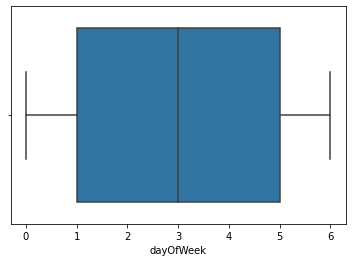

In [16]:
# checking for outliers

print(sns.boxplot(df['dayOfWeek']))

##6.0 Exploratory Data Analysis

Exploratory Data Analysis refers to the process of performing investigations on a dataset so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations

###a) Univariate Analysis

In [17]:

# Finding the information of the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   postal_code            16085 non-null  int64 
 1   date                   16085 non-null  object
 2   dayOfWeek              16085 non-null  int64 
 3   day_type               16085 non-null  object
 4   BlueCars_taken_sum     16085 non-null  int64 
 5   BlueCars_returned_sum  16085 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 754.1+ KB


Finding the mean

In [18]:
# Finding the mean of the dataset

df[{'BlueCars_taken_sum', 'BlueCars_returned_sum'}].mean()

BlueCars_returned_sum    125.912714
BlueCars_taken_sum       125.926951
dtype: float64

Finding the Mode

In [19]:
# Finding the mode of the dataset

df[{'BlueCars_taken_sum', 'BlueCars_returned_sum'}].mode()

,BlueCars_returned_sum,BlueCars_taken_sum
0,13,12


Finding the Median

In [20]:
# Finding the median of the dataset

df[{'BlueCars_taken_sum', 'BlueCars_returned_sum'}].median()

BlueCars_returned_sum    46.0
BlueCars_taken_sum       46.0
dtype: float64

Finding the Variance

In [21]:
# Finding the variance 

df[{'BlueCars_taken_sum', 'BlueCars_returned_sum'}].var()      

BlueCars_returned_sum    34410.819414
BlueCars_taken_sum       34383.016113
dtype: float64

Finding the Standard deviation

In [22]:
# Finding the standard deviation

df[{'BlueCars_taken_sum', 'BlueCars_returned_sum'}].std()

BlueCars_returned_sum    185.501535
BlueCars_taken_sum       185.426579
dtype: float64

Text(0.5, 1.0, 'Weekday/Weekend')

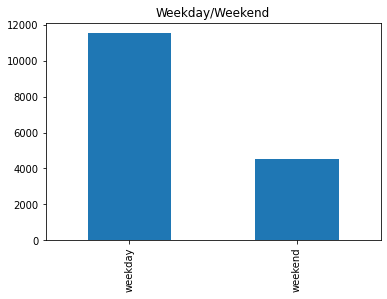

In [23]:
# Records from different days

df.day_type.value_counts().plot.bar()
plt.title('Weekday/Weekend')

Finding the skewness of our data

In [24]:
# Finding the skewness of the data

df[{'BlueCars_taken_sum', 'BlueCars_returned_sum'}].skew()

BlueCars_returned_sum    2.412085
BlueCars_taken_sum       2.406355
dtype: float64

Finding the Kurtosis

In [25]:
# Finding the Kurtosis of the data

df[{'BlueCars_taken_sum', 'BlueCars_returned_sum'}].kurt()

BlueCars_returned_sum    6.186288
BlueCars_taken_sum       6.172692
dtype: float64

###b) Bivariate Analysis and Plotting

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   postal_code            16085 non-null  int64 
 1   date                   16085 non-null  object
 2   dayOfWeek              16085 non-null  int64 
 3   day_type               16085 non-null  object
 4   BlueCars_taken_sum     16085 non-null  int64 
 5   BlueCars_returned_sum  16085 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 754.1+ KB


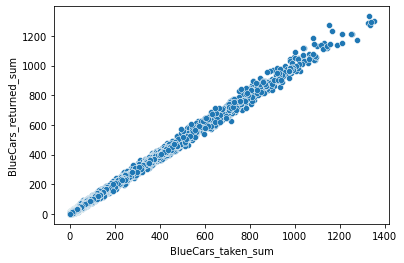

In [27]:

sns.scatterplot(x= df.BlueCars_taken_sum , y= df.BlueCars_returned_sum)
plt.show()

<Figure size 864x720 with 0 Axes>

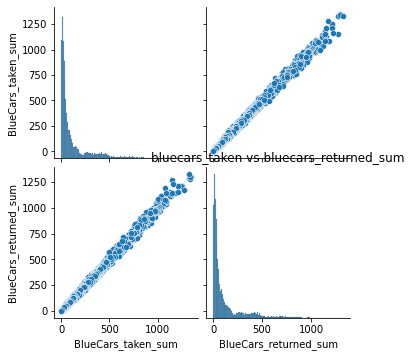

In [28]:
# Determine correlation between numeric features

plt.figure(figsize=(12,10))
sns.pairplot(df[['BlueCars_taken_sum','BlueCars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')
plt.show()

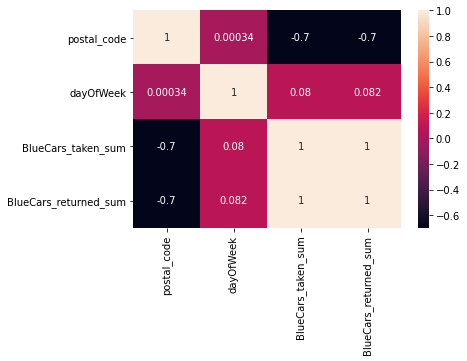

In [29]:
# Finding a correlation between the dataset

sns.heatmap(df.corr(),annot=True)

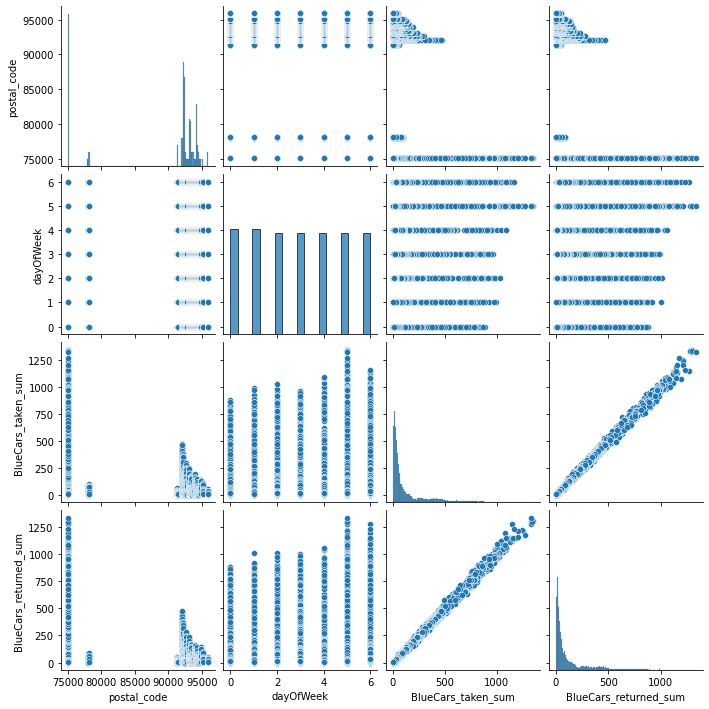

In [30]:
# ploting for correlation

sns.pairplot(df)
plt.show()

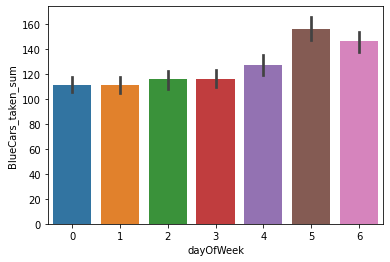

In [31]:
# Check when the usage was highest

sns.barplot(x= df.dayOfWeek, y= df.BlueCars_taken_sum)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


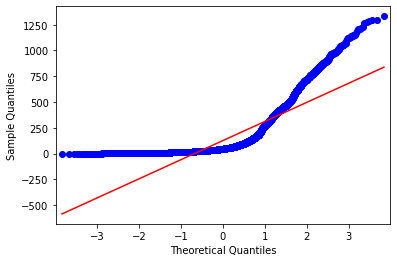

In [32]:
# Checking the normality of our data

from statsmodels.graphics.gofplots import qqplot
data = df['BlueCars_returned_sum']
qqplot(data, line='s')
plt.show()

##7.0 Hypothesis Testing

###a) Creating a null and alternative hypothesis

Null hypothesis(Ho): The average number of blue cars taken is no different compared to that of the blue cars returned at postal code 75001

Alternative hypothesis(Ha): The average number of blue cars taken is different that of the blue cars returned

In [33]:
# Selecting a certain code to work with

df1 = df[(df['postal_code'] == 75001) & (df['day_type'] == 'weekday')]
df1

,postal_code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117
...,...,...,...,...,...,...
149,75001,6/13/2018,2,weekday,98,98
150,75001,6/14/2018,3,weekday,156,156
151,75001,6/15/2018,4,weekday,150,150
154,75001,6/18/2018,0,weekday,122,120


In [34]:
# Generating a random sample of 31

df1_sample = df1.sample(n=31)
df1_sample

,postal_code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
143,75001,6/7/2018,3,weekday,113,113
57,75001,3/2/2018,4,weekday,136,137
46,75001,2/16/2018,4,weekday,130,130
148,75001,6/12/2018,1,weekday,126,126
69,75001,3/14/2018,2,weekday,102,101
91,75001,4/5/2018,3,weekday,118,118
85,75001,3/30/2018,4,weekday,126,128
67,75001,3/12/2018,0,weekday,99,98
52,75001,2/22/2018,3,weekday,121,122
35,75001,2/5/2018,0,weekday,121,121


In [35]:
# Let's get the shape of our newly formed dataframe

df1_sample.shape

(31, 6)

###b) Set a significance level

Our significance level is 0.05.This means that our level of confidence will be 95%

We shall use a sample size of 15

we shall use the t-statistics

###c) Calculating a z-statistic

In [36]:
# Getting the sample mean

pm = df['BlueCars_taken_sum'].mean()
pm

125.92695057506994

In [37]:
pm2 = df['BlueCars_returned_sum'].mean()
pm2

125.912713708424

In [38]:
# Lets now calculate the sample mean

sm = df1_sample['BlueCars_taken_sum'].mean()
sm

111.6774193548387

In [39]:
sm2 = df1_sample['BlueCars_returned_sum'].mean()
sm2

111.19354838709677

In [40]:
sstd = df1_sample['BlueCars_taken_sum'].std()
sstd

24.346645349718024

In [41]:
# Calculating the z-score

zscore = (sm-pm) / sstd
zscore

-0.5852769864410198

In [42]:
#calculating the p value

import scipy.stats as stats
from scipy.stats import norm
pvalue = stats.norm.cdf(zscore)
pvalue

0.2791807432698923

In [43]:
print('Z Score is: ', zscore)
print('P value is: ' , pvalue)

Z Score is:  -0.5852769864410198
P value is:  0.2791807432698923


###d) Drawing a conclusion

Since the p-value (0.3400) is higher than the significance level, we fail to reject the null hypothesis as there isn't enough evidence to support the  alternative hypothesis